In [1]:
>>> import numpy
>>> from astropy import units
>>> from galpy.potential import MWPotential2014, ChandrasekharDynamicalFrictionForce
>>> from galpy.orbit import Orbit
>>> o= Orbit.from_name('LMC')
>>> MWPotential2014[2]*= 1.5 # Don't run this if you've already run it before in the session
>>> cdf= ChandrasekharDynamicalFrictionForce(GMs=10.**11.*units.Msun,rhm=5.*units.kpc,
                                             dens=MWPotential2014)
>>> ts= numpy.linspace(0.,-10.,1001)*units.Gyr
>>> o.integrate(ts,MWPotential2014+cdf)

In [2]:
>>> from galpy.potential import HernquistPotential, MovingObjectPotential
>>> lmcpot= HernquistPotential(amp=2*10.**11.*units.Msun,
                               a=5.*units.kpc/(1.+numpy.sqrt(2.))) #rhm = (1+sqrt(2)) a
>>> moving_lmcpot= MovingObjectPotential(o,pot=lmcpot)

In [3]:
>>> from galpy.potential import (evaluateRforces, evaluatephitorques,
                                 evaluatezforces)
>>> loc_origin= 1e-4 # Small offset in R to avoid numerical issues
>>> ax= lambda t: evaluateRforces(moving_lmcpot,loc_origin,0.,phi=0.,t=t,
                                  use_physical=False)
>>> ay= lambda t: evaluatephitorques(moving_lmcpot,loc_origin,0.,phi=0.,t=t,
                                    use_physical=False)/loc_origin
>>> az= lambda t: evaluatezforces(moving_lmcpot,loc_origin,0.,phi=0.,t=t,
                                  use_physical=False)

In [4]:
>>> t_intunits= o.time(use_physical=False)[::-1] # need to reverse the order for interp
>>> ax4int= numpy.array([ax(t) for t in t_intunits])
>>> ax_int= lambda t: numpy.interp(t,t_intunits,ax4int)
>>> ay4int= numpy.array([ay(t) for t in t_intunits])
>>> ay_int= lambda t: numpy.interp(t,t_intunits,ay4int)
>>> az4int= numpy.array([az(t) for t in t_intunits])
>>> az_int= lambda t: numpy.interp(t,t_intunits,az4int)

In [5]:
>>> from galpy.potential import NonInertialFrameForce
>>> nip= NonInertialFrameForce(a0=[ax_int,ay_int,az_int])

In [7]:
import matplotlib.pyplot as plt

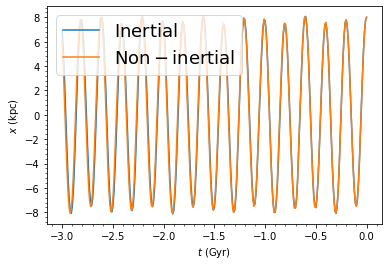

In [8]:
>>> sunts= numpy.linspace(0.,-3.,301)*units.Gyr
>>> osun_inertial= Orbit()
>>> osun_inertial.integrate(sunts,MWPotential2014)
>>> osun_inertial.plotx(label=r'$\mathrm{Inertial}$')
>>> osun_noninertial= Orbit()
>>> osun_noninertial.integrate(sunts,MWPotential2014+nip+moving_lmcpot)
>>> osun_noninertial.plotx(overplot=True,label=r'$\mathrm{Non-inertial}$')
>>> plt.legend(fontsize=18.,loc='upper left',framealpha=0.8)

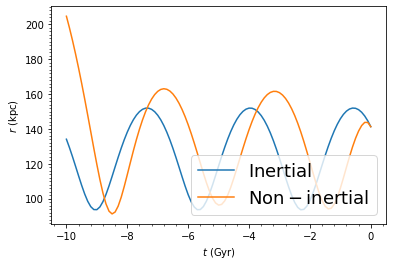

In [9]:
>>> fornaxts= numpy.linspace(0.,-10.,101)*units.Gyr
>>> ofornax_inertial= Orbit.from_name('Fornax')
>>> ofornax_inertial.integrate(fornaxts,MWPotential2014)
>>> ofornax_inertial.plotr(label=r'$\mathrm{Inertial}$')
>>> ofornax_noninertial= Orbit.from_name('Fornax')
>>> ofornax_noninertial.integrate(fornaxts,MWPotential2014+nip+moving_lmcpot)
>>> ofornax_noninertial.plotr(overplot=True,label=r'$\mathrm{Non-inertial}$')
>>> plt.autoscale()
>>> plt.legend(fontsize=18.,loc='lower right',framealpha=0.8)

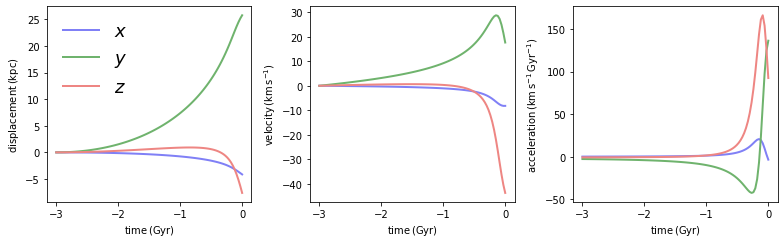

In [10]:
>>> from scipy import integrate
>>> from galpy.util import conversion
>>> vo, ro= 220., 8.
>>> int_ts_phys= numpy.linspace(-3.,0.,101)
>>> int_ts= int_ts_phys/conversion.time_in_Gyr(vo,ro)
>>> ax4plot= ax_int(int_ts)
>>> ay4plot= ay_int(int_ts)
>>> az4plot= az_int(int_ts)
>>> vx4plot= integrate.cumulative_trapezoid(ax4plot,x=int_ts,initial=0.)
>>> vy4plot= integrate.cumulative_trapezoid(ay4plot,x=int_ts,initial=0.)
>>> vz4plot= integrate.cumulative_trapezoid(az4plot,x=int_ts,initial=0.)
>>> xx4plot= integrate.cumulative_trapezoid(vx4plot,x=int_ts,initial=0.)
>>> xy4plot= integrate.cumulative_trapezoid(vy4plot,x=int_ts,initial=0.)
>>> xz4plot= integrate.cumulative_trapezoid(vz4plot,x=int_ts,initial=0.)
>>> plt.figure(figsize=(11,3.5))
>>> plt.subplot(1,3,1)
>>> plt.plot(int_ts_phys,xx4plot*ro,color=(0.5,0.5,247./256.),lw=2.,
             label=r'$x$')
>>> plt.plot(int_ts_phys,xy4plot*ro,color=(111./256,180./256,109./256),lw=2.,
             label=r'$y$')
>>> plt.plot(int_ts_phys,xz4plot*ro,color=(239./256,135./256,132./256),lw=2.,
             label=r'$z$')
>>> plt.xlabel(r'$\mathrm{time}\,(\mathrm{Gyr})$')
>>> plt.ylabel(r'$\mathrm{displacement}\,(\mathrm{kpc})$')
>>> plt.legend(frameon=False,fontsize=18.)
>>> plt.subplot(1,3,2)
>>> plt.plot(int_ts_phys,vx4plot*vo,color=(0.5,0.5,247./256.),lw=2.)
>>> plt.plot(int_ts_phys,vy4plot*vo,color=(111./256,180./256,109./256),lw=2.)
>>> plt.plot(int_ts_phys,vz4plot*vo,color=(239./256,135./256,132./256),lw=2.)
>>> plt.xlabel(r'$\mathrm{time}\,(\mathrm{Gyr})$')
>>> plt.ylabel(r'$\mathrm{velocity}\,(\mathrm{km\,s}^{-1})$')
>>> plt.subplot(1,3,3)
>>> plt.plot(int_ts_phys,-ax4plot*conversion.force_in_kmsMyr(vo,ro)*1000.,
             color=(0.5,0.5,247./256.),lw=2.)
>>> plt.plot(int_ts_phys,-ay4plot*conversion.force_in_kmsMyr(vo,ro)*1000.,
             color=(111./256,180./256,109./256),lw=2.)
>>> plt.plot(int_ts_phys,-az4plot*conversion.force_in_kmsMyr(vo,ro)*1000.,
             color=(239./256,135./256,132./256),lw=2.)
>>> plt.xlabel(r'$\mathrm{time}\,(\mathrm{Gyr})$')
>>> plt.ylabel(r'$\mathrm{acceleration}\,(\mathrm{km\,s}^{-1}\,\mathrm{Gyr}^{-1})$')
>>> plt.tight_layout()